In [39]:
import numpy as np
import matplotlib.pyplot as plt

In [40]:
try:
    import sim
except:
    print ('--------------------------------------------------------------')
    print ('"sim.py" could not be imported. This means very probably that')
    print ('either "sim.py" or the remoteApi library could not be found.')
    print ('Make sure both are in the same folder as this file,')
    print ('or appropriately adjust the file "sim.py"')
    print ('--------------------------------------------------------------')
    print ('')

import time

### Funções de Matriz de rotação e plotagem

In [41]:

def Rx(theta):
 
    return np.array([[  1, 0            , 0           ],
                      [ 0, np.cos(theta),-np.sin(theta)],
                      [ 0, np.sin(theta), np.cos(theta)]])
  
def Ry(theta):
 
    return np.array([[  np.cos(theta), 0, np.sin(theta)],
                      [ 0            , 1, 0           ],
                      [-np.sin(theta), 0, np.cos(theta)]])


def Rz(theta):
  
    return np.array([[ np.cos(theta), -np.sin(theta), 0 ],
                      [ np.sin(theta), np.cos(theta) , 0 ],
                      [ 0            , 0             , 1 ]])

# Plota um referencial no plano
def plot_frame(Porg, R, c=None):

    axis_size = 1.0    
    axes = axis_size*R
    
    x_axis = np.array(axes[0:2,0])
    y_axis = np.array(axes[0:2,1])
    
    if c == None:
        c = ['r', 'g']
    
    # X
    plt.quiver(*Porg[0:2], *x_axis, color=c[0], angles='xy', scale_units='xy', scale=1)
    
    # Y
    plt.quiver(*Porg[0:2], *y_axis, color=c[1], angles='xy', scale_units='xy', scale=1)
    


### Função para obter posição, angulos de euler e plotar referenciais

In [53]:
def plot_object_frame(clientID,nameObject):
    # Pega Handle do objeto
    returnCode, objectHandle = sim.simxGetObjectHandle(clientID, nameObject, sim.simx_opmode_oneshot_wait)
    
    # Euler Angles
    returnCode,eulerAngles=sim.simxGetObjectOrientation(clientID,objectHandle,-1,sim.simx_opmode_oneshot_wait)
    
    # Position
    returnCode,position=sim.simxGetObjectPosition(clientID,objectHandle,-1,sim.simx_opmode_oneshot_wait)

    print(position)

    # Frame Object
    Porg = np.array(position)    
    R = Rz(eulerAngles[2])
    plot_frame(Porg, R)

Program started
Connected to remote API server
[0.007537084631621838, -1.4679468870162964, 0.13869395852088928]
[-1.5499998331069946, -0.8750000596046448, 0.16500011086463928]
[-1.25, 1.5500006675720215, 0.4500003755092621]
[1.75, 1.4750006198883057, 0.4500003755092621]
[0.07499994337558746, 1.225000023841858, 0.3749954402446747]
Program ended


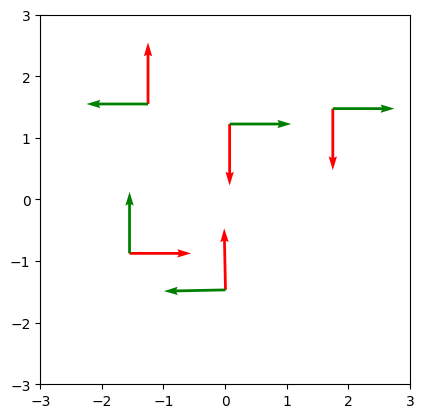

In [55]:
print ('Program started')
sim.simxFinish(-1) # just in case, close all opened connections
clientID=sim.simxStart('127.0.0.1',19999,True,True,5000,5) # Connect to CoppeliaSim

if clientID!=-1:
    print ('Connected to remote API server')
    
    # Iniciando a simulação

    # Plot Robo Pioneer
    plot_object_frame(clientID,'Pioneer_p3dx')

    # Plot Plant
    plot_object_frame(clientID,'indoorPlant')

    # Plot Chair[0]
    plot_object_frame(clientID,'/diningChair{0}')

    # Plot Chair[1]
    plot_object_frame(clientID,'/diningChair{1}')

    # Plot Table
    plot_object_frame(clientID,'diningTable')

    plt.axis('scaled')
    plt.axis((-3, 3, -3, 3))
    
    # Parando a simulação     
    sim.simxStopSimulation(clientID,sim.simx_opmode_blocking)         
        
    # Now close the connection to CoppeliaSim:
    sim.simxFinish(clientID)
    
else:
    print ('Failed connecting to remote API server')
    
print ('Program ended')